<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%8B%A4%EC%8A%B505_XORModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch 
### 실습05. Perceptron Modeling : XOR Function

1. Prepare Dataset 
2. Train Model
3. Test Model

<img src="https://dl.dropbox.com/s/90ym4l4c7falev8/xor.png" width="400"/>


#### 1. Prepare Data

In [1]:
# 1-1. 데이터 준비

import torch

X = torch.FloatTensor([[0,0], [1,0], [0,1], [1,1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

print(X)
print(y)

tensor([[0., 0.],
        [1., 0.],
        [0., 1.],
        [1., 1.]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [2]:
# 1-2. 데이터 확인

print(X.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


#### 2. Train Model

In [23]:
# 2-1. Network

import torch.nn as nn

# 순차적 계층 MLP
model = nn.Sequential(
    nn.Linear(2, 8), 
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [11]:

# Model Class

import torch.nn.functional as F

class XORModel(nn.Module): 
  # 모델 객체 생성할때 호출되는 method 
  def __init__(self):
    # 모델에 사용할 구성요소 입력, layer, activation func
    super().__init__()

    self.linear1 = nn.Linear(2, 8)
    self.linear2 = nn.Linear(8, 1)

    # self.relu = nn.ReLU()
    # self.sigmoid = nn.Sigmoid()
    # print("Model Init")

  # 모델 객체를 데이터와 함께 호출하면 실행되는 method ex) model(x)/model.forward(x)
  def forward(self, input): 
    # input을 받아서, 어떤 계산을 거쳐 output으로 나오는지 연산 흐름 작성
    
    # output = self.linear1(input)
    # output = self.relu(output)
    # output = self.linear2(output)
    # output = self.sigmoid(output)
    # print("Forward")

    output = F.relu(self.linear1(input)) #linear과 relu를 한번해 함
    output = torch.sigmoid(self.linear2(output))
    return output

model = XORModel()

In [24]:
# 2-2. Loss Function & Optimizer

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1) 


In [25]:
# 2-3. Train

losses = []

for step in range(1000):
    output = model(X) # forward
    loss = loss_fn(output, y) # cost
    losses.append(loss.detach().numpy())
    optimizer.zero_grad() # gradient zero

    loss.backward() # backward(gradient 계산)
    optimizer.step() # paremeters update

    if step % 100 == 0:
      print(step, loss.item())

0 0.6970720291137695
100 0.015024854801595211
200 0.004647926427423954
300 0.002569803036749363
400 0.0017299567116424441
500 0.001289152423851192
600 0.0010156924836337566
700 0.0008345865062437952
800 0.0007057781331241131
900 0.000609743467066437


Text(0, 0.5, 'Loss')

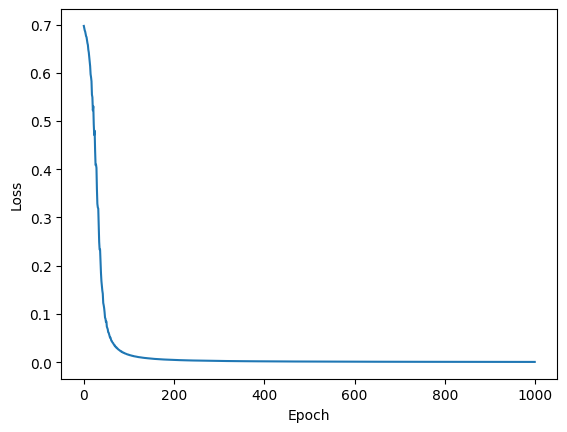

In [26]:
# 2-4. Loss Graph

import matplotlib.pyplot as plt

plt.plot(range(1000), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

#### 3. Test Model

In [22]:
# 3. Test

test_tensor = torch.FloatTensor([[0,1], [1,1], [0,0], [1,0]])

with torch.no_grad(): # gradient 저장하지지 않음
  output = model(test_tensor)
  output[output >= 0.5] = 1
  output[output < 0.5] = 0
  print(output)

tensor([[1.],
        [1.],
        [1.],
        [1.]])


#### 4. Save Model

In [27]:
# weight 값만 저장
torch.save(model.state_dict(), 'xor_model.pth')

In [ ]:
# paremeter 값 저장(모델 구조 저장하지 않음)
torch.save(model.state_dict(), 'xor_model.pth')

In [28]:
# 모델의 구조와 paremeter 값 함께
torch.save(model, 'model.pth')

In [29]:
# 모델 불러오기
model_saved = torch.load('model.pth')
print(model_saved)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)
